In [ ]:
## ----- Installing and Importing All Dependencies -----


# Installing Dependencies
!pip install -q kaggle

# Importing Dependencies
import os
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from google.colab import files

In [38]:
## ----- Download NLTK Data -----

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
## ----- Uploading .json for API's Access -----

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [40]:
## ----- Downloading and Unzipping the Dataset -----

!kaggle datasets download -d archanghosh/robert-frost-collection --unzip -p /content/data

Dataset URL: https://www.kaggle.com/datasets/archanghosh/robert-frost-collection
License(s): CC0-1.0
  0% 0.00/91.7k [00:00<?, ?B/s]
100% 91.7k/91.7k [00:00<00:00, 272MB/s]


In [41]:
## ----- Loading and Cleaning the Text Data -----


# Load text
with open("/content/data/robert_frost_collection.csv", "r", encoding="utf-8") as f:
    text = f.read()

# Basic cleaning
text = re.sub(r'\n+', '\n', text).lower().strip()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# Padding
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split data
X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)

print(f"Total Sequences: {len(input_sequences)}")
print(f"Vocabulary Size: {total_words}")
print(f"Max Sequence Length: {max_seq_len}")

Total Sequences: 38192
Vocabulary Size: 5664
Max Sequence Length: 20


In [42]:
## ----- Building the LSTM model -----


model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len - 1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
## ----- Taining the Model -----

history = model.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0489 - loss: 7.0144
Epoch 2/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0598 - loss: 6.3627
Epoch 3/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0817 - loss: 5.9516
Epoch 4/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0990 - loss: 5.5762
Epoch 5/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1166 - loss: 5.2117
Epoch 6/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1376 - loss: 4.8893
Epoch 7/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1578 - loss: 4.5800
Epoch 8/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1786 - loss: 4.3117
Epoch 9/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2188 - loss: 4.0099
Epoch 10/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2540 - loss: 3.7462
Epoch 11/50
1194/1194 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2997 - loss: 3.4825
Epoch 12/50
1194/1194 ━━━

In [44]:
## ----- Generate Text Using the Model -----

def generate_text(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Skip if token_list is empty
        if not token_list:
            break

        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)

        # If word not found, break the loop
        output_word = tokenizer.index_word.get(predicted_index)
        if output_word is None:
            break

        seed_text += ' ' + output_word
    return seed_text

In [45]:
## -----Save the Model -----

model.save("robert_frost_text_generator.h5")
print("Model saved successfully.")

Model saved successfully.


In [46]:
## ----- Evaluate - Perplexity and Accuracy -----

import math
final_loss = history.history['loss'][-1]
perplexity = math.exp(final_loss)
print(f"Perplexity Score: {perplexity:.2f}")

Perplexity Score: 2.03


In [47]:
## ----- Evaluation Metrics -----


import matplotlib.pyplot as plt
import math

final_accuracy = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]

print(f"Final Training Accuracy: {final_accuracy * 100:.2f}%")
print(f"Final Training Loss: {final_loss:.4f}")

Final Training Accuracy: 83.54%
Final Training Loss: 0.7067


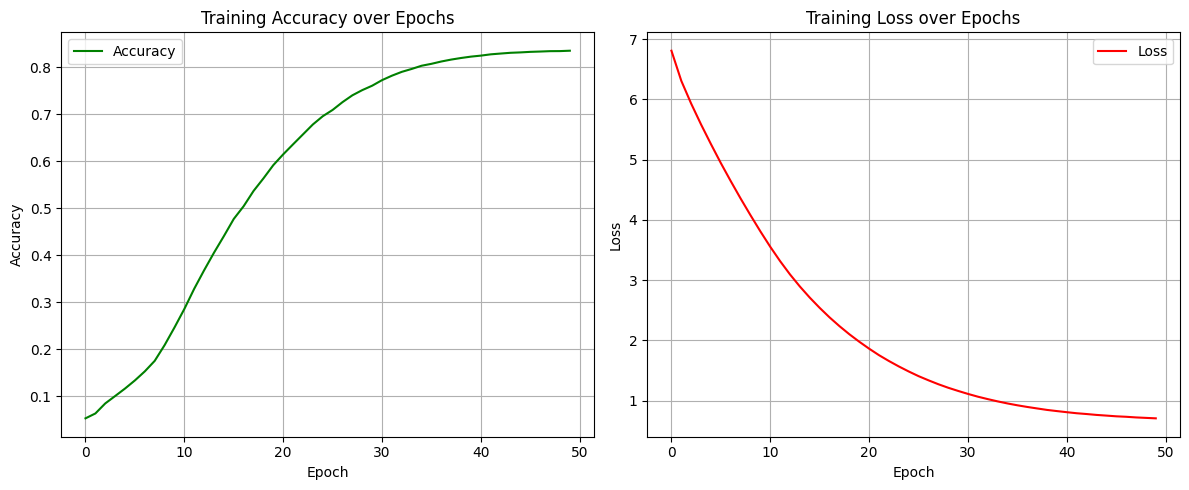

In [48]:
## ----- Plot Accuracy and Loss over Epochs -----

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

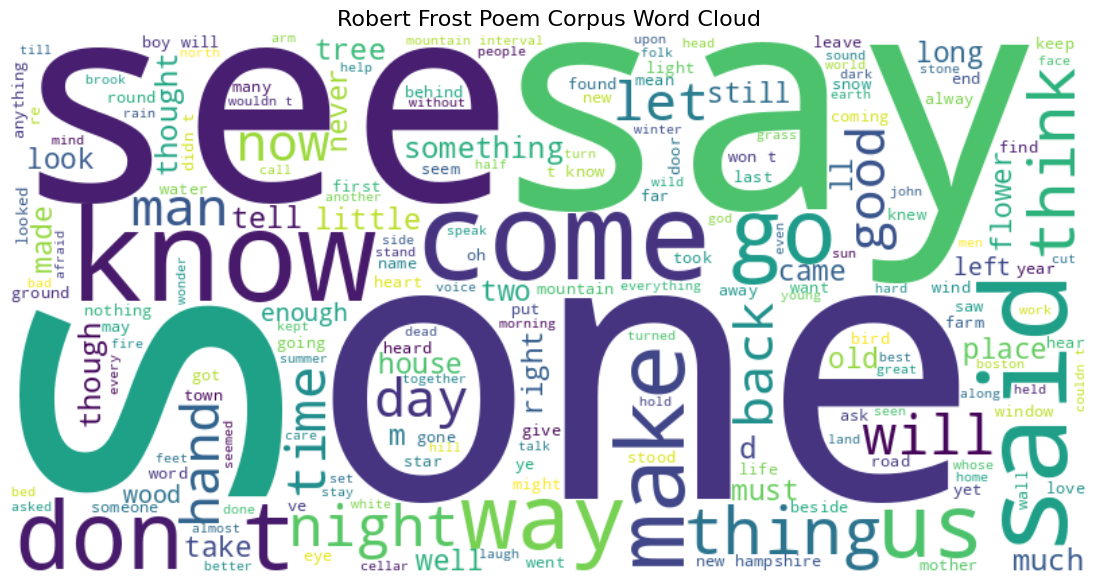

In [49]:
## ----- Word Cloud (Optional Visualization of Corpus) -----
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Robert Frost Poem Corpus Word Cloud", fontsize=16)
plt.show()